In [1]:
# E train
# average AM enters / exits

In [1]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [2]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [3]:
# look at E line only
E_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('E')]

In [4]:
# look at all station names
E_train_all['STATION'].unique()

array(['14 ST', '23 ST', '34 ST-PENN STA', '42 ST-PORT AUTH',
       '5 AV/53 ST', '50 ST', '7 AV', '74 ST-BROADWAY', '75 AV', '8 AV',
       'BRIARWOOD', 'CANAL ST', 'CHAMBERS ST', 'COURT SQ',
       'COURT SQ-23 ST', 'FOREST HILLS 71', 'JAMAICA CENTER',
       'JAMAICA VAN WK', 'JFK JAMAICA CT1', 'JKSN HT-ROOSVLT',
       'KEW GARDENS', 'LEXINGTON AV/53', 'PARK PLACE', 'QUEENS PLAZA',
       'SPRING ST', 'SUTPHIN-ARCHER', 'TIMES SQ-42 ST', 'W 4 ST-WASH SQ',
       'WORLD TRADE CTR'], dtype=object)

In [5]:
# check station count
E_train_all['STATION'].count()

33

In [8]:
# needs further cleaning
E_train_all["STATION"].replace("COURT SQ", value="COURT SQ-23 ST", inplace=True)
E_train_all["STATION"].replace("JFK JAMAICA CT1", value="JAMAICA CENTER", inplace=True)
E_train_all["STATION"].replace("74 ST-BROADWAY", value="JKSN HT-ROOSVLT", inplace=True)
E_train_all["STATION"].replace("8 AV", value="50 ST", inplace=True)
E_train_all["STATION"].replace("TIMES SQ-42 ST", value="42 ST-PORT AUTH", inplace=True)
E_train_all["STATION"].replace("CHAMBERS ST", value="WORLD TRADE CTR", inplace=True)
E_train_all["STATION"].replace("PARK PLACE", value="WORLD TRADE CTR", inplace=True)

In [10]:
# now sum same name rows
E_commuters = E_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
E_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
14 ST,3919.0,11802.0
23 ST,5125.0,5958.0
34 ST-PENN STA,104956.0,48578.0
42 ST-PORT AUTH,89292.0,59136.0
5 AV/53 ST,2646.0,64187.0


In [11]:
# order stations in excel
# save as csv
E_commuters.to_csv('E_commuters.csv')

In [13]:
# open ordered CSV
csv_path_E = 'E_commuters_order.csv'
E_commuters_order = pd.read_csv(csv_path_E, encoding="utf-8")
E_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,JAMAICA CENTER,40305,9046
1,SUTPHIN-ARCHER,22381,9521
2,JAMAICA VAN WK,6515,3012
3,BRIARWOOD,3372,447
4,KEW GARDENS,60288,19183


In [14]:
E_commuters_order['AM_AVG_ENTER'] = E_commuters_order['AM_ENTERS']/5

In [15]:
E_commuters_order['AM_AVG_EXIT'] = E_commuters_order['AM_EXITS']/5
E_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,JAMAICA CENTER,40305,9046,8061.0,1809.2
1,SUTPHIN-ARCHER,22381,9521,4476.2,1904.2
2,JAMAICA VAN WK,6515,3012,1303.0,602.4
3,BRIARWOOD,3372,447,674.4,89.4
4,KEW GARDENS,60288,19183,12057.6,3836.6


In [16]:
# order stations in excel
# save as csv
E_commuters_order.to_csv('E_commuters_final.csv')

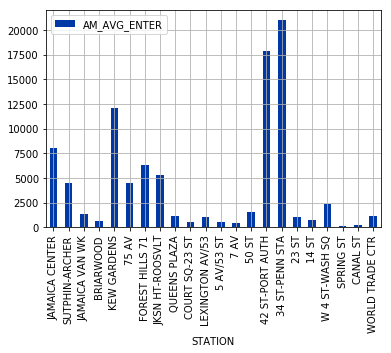

In [17]:
# graph E Train AM AVG ENTERS
plt = A=E_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#0039A6')
plt.grid()

# save the fig
plt.figure.savefig('E-AM-enter.pdf')

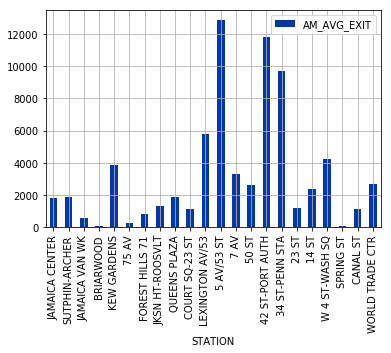

In [18]:
# graph E Train AM AVG EXITS
plt = E_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#0039A6')
plt.grid()

# save the fig
plt.figure.savefig('E-AM-exit.pdf')